In [1]:
superMagFileStr = 'G:\My Drive\Research\Projects\Data\20201219-12-39-substorms.txt';

In [2]:
%%file load_ascii_files.m
function data=load_ascii_files(loadFile, format, headerlines)
if nargin<3
    headerlines = 1;
end
fileID = fopen(loadFile,'r');
data = textscan(fileID, format, 'headerlines', headerlines);
fclose(fileID);
end

Created file 'C:\Users\nithin\Documents\GitHub\energy-height-conversion\Tools\Routines\Paper 3\load_ascii_files.m'.


In [3]:
format ='%4f %2f %2f %2f %2f %5.2f %5.2f ';
tempData = load_ascii_files(superMagFileStr, format, 69);
superMag.datetime = datetime(tempData{1},tempData{2},tempData{3},tempData{4},tempData{5},zeros(size(tempData{5})));
superMag.time = datenum(datestr(superMag.datetime));
superMag.mlat = tempData{6};
superMag.mlt = tempData{7};

In [75]:
interArrivalTimes = diff(superMag.datetime(34:end));

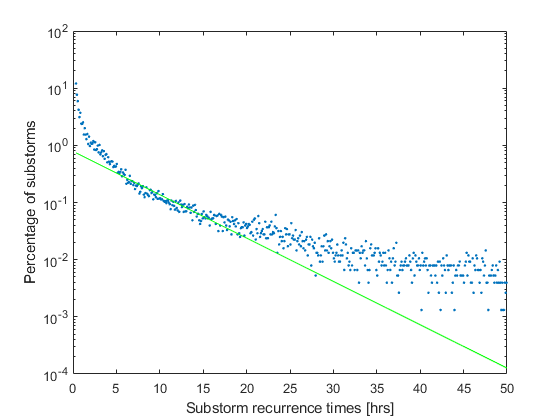

In [227]:
%%plot inline
Xh =  histogram(hours(interArrivalTimes),'BinWidth',0.1);
Xy = 100*Xh.Values./sum(Xh.Values);
Xx =  Xh.BinEdges(1:end-1)+Xh.BinWidth/2;
hold off;
h = plot(Xx,Xy,'.');
set(gca,'YScale','log');
set(gca,'XScale','linear');
xlim([0,50]);
%ylim([0.00001,50]);

fitfun = fittype(@(a,r,x) a.*exp(-x./r));
r0 = 100;
a0 = 0.3;
%for i = 1:150
%    for j = i+2:1:160
%    [Xy_fit, gof] = fit(Xx(Xx>i & Xx<j)',Xy(Xx>i & Xx<j)',fitfun,'StartPoint',[a0,r0],'Lower',[0.001,0.1]);
%    adjrsquare(i,j) = gof.adjrsquare;
%    rmse(i,j) = gof.rmse;
%    end
%end
[Xy_fit, gof] = fit(Xx(Xx>5& Xx<165)',Xy(Xx>5 & Xx<165)',fitfun,'StartPoint',[a0,r0],'Lower',[0.01,0.01]);
hold on;
plot(Xx,Xy_fit(Xx),'g');
xlabel('Substorm recurrence times [hrs]');
ylabel('Percentage of substorms')

In [228]:
min(interArrivalTimes)


ans = 

  duration

   00:20:00




In [215]:
Xy_fit
gof


Xy_fit = 

     General model:
     Xy_fit(x) = a.*exp(-x./r)
     Coefficients (with 95% confidence bounds):
       a =      0.8005  (0.7393, 0.8617)
       r =       5.636  (5.344, 5.928)

gof = 

  struct with fields:

           sse: 0.1302
       rsquare: 0.9197
           dfe: 248
    adjrsquare: 0.9193
          rmse: 0.0229




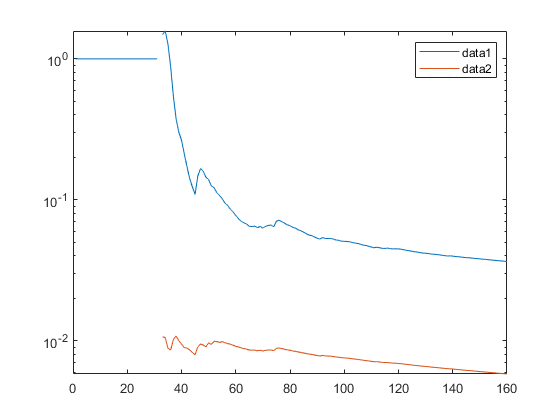

In [162]:
k = 30; plot(1-adjrsquare(k,:)); hold on; plot(rmse(k,:)); set(gca,'YScale','log'); legend;